In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [17]:
data = pd.read_csv('test.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-30,29700,30000,29680,30000,41.274914,10588400
1,2013-10-31,29960,30040,29300,29300,40.311840,12647050
2,2013-11-01,29800,30000,29360,30000,41.274914,11357700
3,2013-11-04,29840,30040,29780,29980,41.247398,10887800
4,2013-11-05,30040,30040,29440,29700,40.862167,8009300


In [18]:
data.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1220,False,False,False,False,False,False,False
1221,False,False,False,False,False,False,False
1222,False,False,False,False,False,False,False
1223,False,False,False,False,False,False,False


In [19]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [20]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [21]:
mid_prices[index:]

array([46750., 45625., 44875., 45125., 44175., 44225., 43850., 44300.,
       45550., 45950., 45975., 46275., 46625., 46600., 47325., 47725.,
       47800., 47500., 46925., 46100., 44800., 45275., 45475., 44800.,
       44375., 45375., 45350., 45300., 45950., 47000., 47050., 46975.,
       46775., 46300., 46200., 45150., 45025., 44700., 45000., 43875.,
       43925., 43700., 43750., 44250., 44075., 43800., 43575., 43000.,
       42675., 41050., 40850., 41250.])

In [22]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1057, 50, 1), (117, 50, 1))

In [23]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=10)

Train on 1057 samples, validate on 117 samples
Epoch 1/10
1057/1057 [==============================] - 7s 6ms/step - loss: 0.0016 - val_loss: 8.3886e-04
Epoch 2/10
1057/1057 [==============================] - 6s 5ms/step - loss: 7.6616e-04 - val_loss: 4.7795e-04
Epoch 3/10
1057/1057 [==============================] - 6s 5ms/step - loss: 5.5823e-04 - val_loss: 2.6013e-04
Epoch 4/10
1057/1057 [==============================] - 6s 6ms/step - loss: 4.3322e-04 - val_loss: 3.8714e-04
Epoch 5/10
1057/1057 [==============================] - 6s 6ms/step - loss: 3.3739e-04 - val_loss: 1.7660e-04
Epoch 6/10
1057/1057 [==============================] - 6s 6ms/step - loss: 2.7173e-04 - val_loss: 3.4456e-04
Epoch 7/10
1057/1057 [==============================] - 6s 6ms/step - loss: 2.4751e-04 - val_loss: 2.9508e-04
Epoch 8/10
1057/1057 [==============================] - 6s 5ms/step - loss: 2.3369e-04 - val_loss: 1.6253e-04
Epoch 9/10
1057/1057 [==============================] - 6s 6ms/step - loss: 2

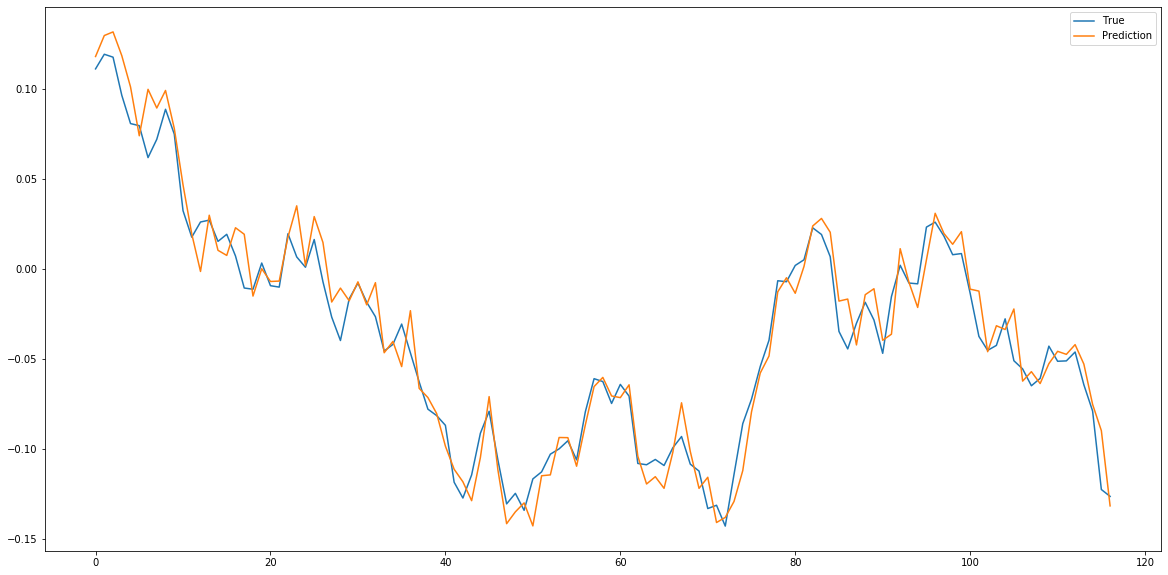

In [25]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()